# Titanic

<img src='data/data_description.JPG'>

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df_train = pd.read_csv('data/train.csv', header = 0, dtype={'Age': np.float64})
df_test  = pd.read_csv('data/test.csv' , header = 0, dtype={'Age': np.float64})
df = df_train.append(df_test, ignore_index=True)

In [109]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1303,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
117,118,0.0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
666,667,0.0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
1076,1077,NaN,2,"Maybery, Mr. Frank Hubert",male,40.0,0,0,239059,16.0000,NaN,S
237,238,1.0,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.2500,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
44,45,1.0,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
45,46,0.0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
84,85,1.0,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
1216,1217,NaN,3,"Assam, Mr. Ali",male,23.0,0,0,SOTON/O.Q. 3101309,7.0500,NaN,S


In [110]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Cabin

In [111]:
df_train['Cabin'].isnull().sum()

687

In [112]:
print(df_test.shape)
df_test['Cabin'].isnull().sum()

(418, 11)


327

In [113]:
df['Cabin_Flag'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Flag
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [114]:
df['Cabin'].fillna('Missing',inplace=True)
df['Cabin']=df['Cabin'].astype(str).str[0]
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [115]:
mean_ordinals = df.groupby(['Cabin'])['Survived'].mean().sort_values().to_dict()
mean_ordinals

{'T': 0.0,
 'M': 0.29985443959243085,
 'A': 0.4666666666666667,
 'G': 0.5,
 'C': 0.5932203389830508,
 'F': 0.6153846153846154,
 'B': 0.7446808510638298,
 'E': 0.75,
 'D': 0.7575757575757576}

In [116]:
df['Cabin_mean_encode']=df['Cabin'].map(mean_ordinals)

In [117]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Flag,Cabin_mean_encode
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0,0.299854
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,0.593220


In [118]:
tr_df = df[df['Survived'].notnull()]
ts_df = df[df['Survived'].isnull()]

In [119]:
tr_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Flag,Cabin_mean_encode
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0,0.299854
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,0.593220
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0,0.299854
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1,0.593220
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0,0.299854


# Embraked

In [120]:
df_train['Embarked'].isnull().sum()

2

In [121]:
tr_df['Embarked'].mode()[0]

'S'

In [122]:
frequent=tr_df['Embarked'].mode()[0]
tr_df['Embarked'].fillna(frequent,inplace=True)

In [123]:
tr_df.Sex.replace(to_replace=dict(female=1, male=0), inplace=True)
ts_df.Sex.replace(to_replace=dict(female=1, male=0), inplace=True)

In [124]:
tr_df.Embarked.replace(to_replace=dict(S=0,C=1,Q=2), inplace=True)
ts_df.Embarked.replace(to_replace=dict(S=0,C=1,Q=2), inplace=True)

In [125]:
tr_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Flag,Cabin_mean_encode
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,M,0,0,0.299854
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,1,0.593220
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,M,0,0,0.299854
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,0,1,0.593220
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,M,0,0,0.299854


# Age

In [126]:
tr_df['Age'].isnull().sum()

177

In [127]:
ts_df['Age'].isnull().sum()

86

In [128]:
#sort the ages into groups

tr_df["Age"] = tr_df["Age"].fillna(-0.5)
ts_df["Age"] = ts_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
tr_df['AgeGroup'] = pd.cut(tr_df["Age"], bins, labels = labels)
ts_df['AgeGroup'] = pd.cut(ts_df["Age"], bins, labels = labels)

tr_df['Title'] = tr_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
ts_df['Title'] = ts_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

tr_df['Title'] = tr_df['Title'].replace({"Capt": "Officer", "Col": "Officer","Major": "Officer","Jonkheer": "Royalty","Don": "Royalty","Dona": "Royalty",
                                                "Sir": "Royalty", "Dr": "Officer", "Rev": "Officer", "the Countess": "Royalty", "Mme": "Mrs", "Mlle": "Miss",
                                                "Ms": "Mrs", "Mr": "Mr", "Mrs": "Mrs", "Miss": "Miss", "Master": "Master","Lady": "Royalty"})

ts_df['Title'] = ts_df['Title'].replace({"Capt": "Officer", "Col": "Officer", "Major": "Officer","Jonkheer": "Royalty", "Don": "Royalty","Dona": "Royalty",
                                           "Sir": "Royalty","Dr": "Officer","Rev": "Officer","the Countess": "Royalty","Mme": "Mrs","Mlle": "Miss","Ms": "Mrs",
                                           "Mr": "Mr","Mrs": "Mrs","Miss": "Miss","Master": "Master","Lady": "Royalty"})

In [129]:
master_ages = list(ts_df.loc[ts_df['Title'] == 'Master']['Age'])
officer_ages = list(ts_df.loc[ts_df['Title'] == 'Officer']['Age'])
royalty_ages = list(ts_df.loc[ts_df['Title'] == 'Royalty']['Age'])
mrs_ages = list(ts_df.loc[ts_df['Title'] == 'Mrs']['Age'])
miss_ages = list(ts_df.loc[ts_df['Title'] == 'Miss']['Age'])
mr_ages = list(ts_df.loc[ts_df['Title'] == 'Mr']['Age'])

print(f'Ages for people sharing Master title: {master_ages}')
print(f'Ages for people sharing Officer title: {officer_ages}')
print(f'Ages for people sharing Royalty title: {royalty_ages}')
print(f'Ages for people sharing Mrs title: {mrs_ages}')
print(f'Ages for people sharing Miss title: {miss_ages}')
print(f'Ages for people sharing Mr title: {mr_ages}')

Ages for people sharing Master title: [9.0, 10.0, 13.0, 6.0, 2.0, 13.0, 7.0, 11.5, 8.0, 6.0, 0.33, -0.5, 0.75, 0.83, -0.5, -0.5, 14.5, 5.0, 6.0, 13.0, -0.5]
Ages for people sharing Officer title: [53.0, 30.0, 41.0, 47.0, 53.0]
Ages for people sharing Royalty title: [39.0]
Ages for people sharing Mrs title: [47.0, 22.0, 18.0, 23.0, 47.0, 24.0, 45.0, -0.5, 48.0, 33.0, -0.5, 30.0, 45.0, 60.0, 36.0, -0.5, 60.0, 55.0, -0.5, 22.0, 27.0, 76.0, 43.0, 16.0, 63.0, 29.0, 35.0, -0.5, 23.0, 36.0, 26.0, 26.0, -0.5, 36.0, 64.0, 18.0, 27.0, -0.5, 60.0, 50.0, 22.0, 53.0, -0.5, 48.0, 55.0, 45.0, 22.0, 29.0, -0.5, 29.0, 26.0, 64.0, 45.0, 55.0, 48.0, 19.0, 58.0, 38.0, 45.0, 59.0, 30.0, 24.0, 31.0, 25.0, -0.5, 45.0, 54.0, -0.5, 19.0, 51.0, 18.0, 48.0, 37.0]
Ages for people sharing Miss title: [30.0, 27.0, 22.0, -0.5, 21.0, 20.0, 28.0, 36.0, 22.0, 18.0, 24.0, 29.0, 35.0, 24.0, 27.0, 18.0, 20.0, -0.5, 36.0, 18.5, 1.0, 12.0, 17.0, -0.5, 23.0, 10.0, 33.0, 29.0, 23.0, -0.5, 26.0, 22.0, 15.0, 20.0, 21.0, -0.5, 1

In [130]:
ts_df.groupby('Title')['Age'].mean().round()

Title
Master      6.0
Miss       18.0
Mr         24.0
Mrs        33.0
Officer    45.0
Royalty    39.0
Name: Age, dtype: float64

In [131]:
ts_df.loc[(ts_df['Age'] == -0.5) & (ts_df['Title']=='Master'),'Age'] = 6
ts_df.loc[(ts_df['Age'] == -0.5) & (ts_df['Title']=='Miss'),'Age'] = 18
ts_df.loc[(ts_df['Age'] == -0.5) & (ts_df['Title']=='Mr'),'Age'] = 24
ts_df.loc[(ts_df['Age'] == -0.5) & (ts_df['Title']=='Mrs'),'Age'] = 33
ts_df.loc[(ts_df['Age'] == -0.5) & (ts_df['Title']=='Officer'),'Age'] = 45
ts_df.loc[(ts_df['Age'] == -0.5) & (ts_df['Title']=='Royalty'),'Age'] = 39

tr_df.loc[(tr_df['Age'] == -0.5) & (tr_df['Title']=='Master'),'Age'] = 6
tr_df.loc[(tr_df['Age'] == -0.5) & (tr_df['Title']=='Miss'),'Age'] = 18
tr_df.loc[(tr_df['Age'] == -0.5) & (tr_df['Title']=='Mr'),'Age'] = 24
tr_df.loc[(tr_df['Age'] == -0.5) & (tr_df['Title']=='Mrs'),'Age'] = 33
tr_df.loc[(tr_df['Age'] == -0.5) & (tr_df['Title']=='Officer'),'Age'] = 45
tr_df.loc[(tr_df['Age'] == -0.5) & (tr_df['Title']=='Royalty'),'Age'] = 39

In [132]:
tr_df.shape

(891, 16)

In [133]:
ts_df.shape

(418, 16)

In [134]:
tr_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Flag,Cabin_mean_encode,AgeGroup,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,M,0,0,0.299854,Student,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,1,0.593220,Adult,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,M,0,0,0.299854,Young Adult,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,0,1,0.593220,Young Adult,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,M,0,0,0.299854,Young Adult,Mr


### 1. Drop `PassengerID`, `Ticket`, `Name` and `Cabin`

In [135]:
tr_df = tr_df.drop(['Cabin_Flag','Ticket','Cabin','Name'], axis = 1)
ts_df = ts_df.drop(['Cabin_Flag','Ticket','Cabin','Name'], axis = 1)

In [101]:
tr_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Flag,Cabin_mean_encode,AgeGroup,Title
0,0.0,3,0,22.0,1,0,7.2500,0,0,0.299854,Student,Mr
1,1.0,1,1,38.0,1,0,71.2833,1,1,0.593220,Adult,Mrs
2,1.0,3,1,26.0,0,0,7.9250,0,0,0.299854,Young Adult,Miss
3,1.0,1,1,35.0,1,0,53.1000,0,1,0.593220,Young Adult,Mrs
4,0.0,3,0,35.0,0,0,8.0500,0,0,0.299854,Young Adult,Mr


### 2. Numerical Columns

In [136]:
tr_df.dtypes

PassengerId             int64
Survived              float64
Pclass                  int64
Sex                     int64
Age                   float64
SibSp                   int64
Parch                   int64
Fare                  float64
Embarked                int64
Cabin_mean_encode     float64
AgeGroup             category
Title                  object
dtype: object

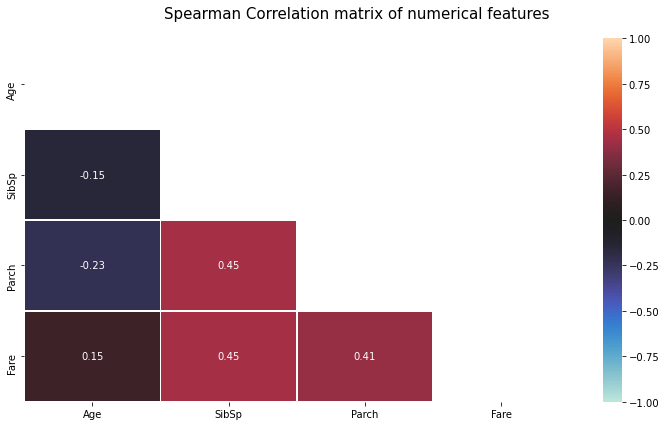

In [137]:
corr = tr_df[['Age','SibSp','Parch','Fare']].corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, linewidths=.5, annot=True)

fig.suptitle('Spearman Correlation matrix of numerical features', fontsize=15)
ax.text(0.77, 0.2, '', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

In [138]:
tr_df.AgeGroup.value_counts()

Young Adult    220
Adult          195
Unknown        177
Student        138
Teenager        70
Baby            44
Child           25
Senior          22
Name: AgeGroup, dtype: int64

In [144]:
age_group = pd.get_dummies(tr_df['AgeGroup'])
age_group.head()

,Unknown,Baby,Child,Teenager,Student,Young Adult,Adult,Senior
0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [145]:
title = pd.get_dummies(tr_df['Title'])
title.head()

,Countess,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0


In [146]:
tr_df = tr_df.drop(['PassengerId','Title','AgeGroup'], axis=1)
ts_df = ts_df.drop(['PassengerId','Title','AgeGroup'], axis=1)
print("Train", tr_df.shape)
print("Test", ts_df.shape)

Train (891, 9)
Test (418, 9)


In [147]:
tr_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_mean_encode
0,0.0,3,0,22.0,1,0,7.2500,0,0.299854
1,1.0,1,1,38.0,1,0,71.2833,1,0.593220
2,1.0,3,1,26.0,0,0,7.9250,0,0.299854
3,1.0,1,1,35.0,1,0,53.1000,0,0.593220
4,0.0,3,0,35.0,0,0,8.0500,0,0.299854


In [148]:
!pip install lazypredict

In [157]:
!pip install tqdm

In [159]:
!pip install lightgbm

  Using cached lightgbm-3.1.1-py2.py3-none-win_amd64.whl (754 kB)


In [161]:
!pip install pytest

  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)


In [162]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [263]:
from sklearn.model_selection import train_test_split
X = tr_df.drop(['Survived','Cabin_mean_encode'], axis=1)
y = tr_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state =42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [00:01<00:00, 23.68it/s]

[17:10:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [00:01<00:00, 27.31it/s]

[17:10:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 23.69it/s]


In [264]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.84,0.85,0.85,0.85,0.15
ExtraTreesClassifier,0.83,0.84,0.84,0.83,0.13
XGBClassifier,0.83,0.84,0.84,0.83,0.12
KNeighborsClassifier,0.83,0.84,0.84,0.83,0.01
LogisticRegression,0.83,0.83,0.83,0.83,0.02
AdaBoostClassifier,0.83,0.83,0.83,0.83,0.14
LinearSVC,0.83,0.83,0.83,0.83,0.05
SVC,0.84,0.83,0.83,0.84,0.03
NuSVC,0.83,0.83,0.83,0.83,0.03


In [265]:
import re
import lightgbm as lgb

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score

X = tr_df.drop(['Survived','Cabin_mean_encode'], axis=1)
y = tr_df[['Survived']]

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.2,random_state =42)


model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

#Split into training and evaluation sets
x_train_lgb, x_eval_lgb, y_train_lgb, y_eval_lgb = train_test_split(X, y, test_size=0.2, random_state=42)

#Remove possible JSON characters
x_train_lgb = x_train_lgb.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
x_eval_lgb = x_eval_lgb.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_train_lgb = y_train_lgb.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_eval_lgb = y_eval_lgb.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# Train the model
model.fit(x_train_lgb, y_train_lgb, eval_set = [(x_eval_lgb, y_eval_lgb)], eval_names =['valid'], eval_metric ='auc', early_stopping_rounds=200);

# prediction
predictions = model.predict(X_test);
prediction_probabilities = model.predict_proba(X_test)[:,1];

# metrics
accuracy_lgbc = accuracy_score(Y_test,predictions)
print(f"Accuracy: {accuracy_lgbc}")
classify_metrics_lgbc = classification_report(Y_test,predictions)  
fpr_lgbc , tpr_lgbc , thresholds   = roc_curve(Y_test,prediction_probabilities)
auc_score_lgbc = auc(fpr_lgbc,tpr_lgbc)
f1_lgbc=f1_score(Y_test,predictions)

[1]	valid's auc: 0.868983	valid's binary_logloss: 0.672007
Training until validation scores don't improve for 200 rounds
[2]	valid's auc: 0.870656	valid's binary_logloss: 0.652988
[3]	valid's auc: 0.872394	valid's binary_logloss: 0.63586
[4]	valid's auc: 0.874003	valid's binary_logloss: 0.620414
[5]	valid's auc: 0.873616	valid's binary_logloss: 0.606456
[6]	valid's auc: 0.87722	valid's binary_logloss: 0.593201
[7]	valid's auc: 0.877606	valid's binary_logloss: 0.581093
[8]	valid's auc: 0.880631	valid's binary_logloss: 0.570009
[9]	valid's auc: 0.878829	valid's binary_logloss: 0.559487
[10]	valid's auc: 0.878443	valid's binary_logloss: 0.549572
[11]	valid's auc: 0.882819	valid's binary_logloss: 0.540364
[12]	valid's auc: 0.883076	valid's binary_logloss: 0.532088
[13]	valid's auc: 0.885393	valid's binary_logloss: 0.52427
[14]	valid's auc: 0.885521	valid's binary_logloss: 0.516611
[15]	valid's auc: 0.886165	valid's binary_logloss: 0.509933
[16]	valid's auc: 0.885328	valid's binary_logloss:

In [153]:
# X_train = tr_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Cabin_mean_encode']]
# y_train = [['Survived']]

# ts_df = ts_df.drop('Survived', axis=1)
# X_test = ts_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Cabin_mean_encode']]
# # no y_test

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [180]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.2,random_state =42)

In [266]:
X_train = tr_df.drop(['Survived','Cabin_mean_encode'], axis=1)
Y_train = tr_df[['Survived']]
gnb = GaussianNB()
cv = cross_val_score(gnb,X,Y,cv=5)
print(cv)
print(cv.mean())

[0.75977654 0.78651685 0.79775281 0.78651685 0.79213483]
0.7845395769254913


In [267]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.79329609 0.78089888 0.79213483 0.76966292 0.83146067]
0.7934906785512522


In [268]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.74301676 0.78089888 0.80898876 0.74719101 0.7752809 ]
0.7710752620676667


In [269]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.62011173 0.65730337 0.69101124 0.69662921 0.68539326]
0.6700897620990522


In [270]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.78212291 0.79775281 0.83707865 0.78651685 0.82022472]
0.8047391877471597


In [271]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[17:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [272]:
from sklearn.svm import SVC

svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.58100559 0.71348315 0.69101124 0.67977528 0.68539326]
0.6701337015880988


In [275]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('rf',rf),('gnb',gnb),('xgb',xgb)], voting = 'soft') 

In [276]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

# str_kfold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

crossval = cross_val_score(voting_clf,X_train,Y_train,cv=10)
print(crossval)
print(crossval.mean())

[17:13:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [199]:
ts_df['Fare'] = ts_df['Fare'].fillna(ts_df['Fare'].mean())

In [257]:
ts_df.drop('Cabin_mean_encode', axis=1, inplace=True)

In [258]:
Xtest = ts_df.copy()

In [260]:
voting_clf.fit(X_train,Y_train)
y_hat_base_vc = voting_clf.predict(Xtest).astype(int)
basic_submission = {'PassengerId': df_test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('try_base_submission.csv', index=False)

[17:00:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [203]:
pred = pd.read_csv("base_submission.csv")

In [204]:
pred.dtypes

PassengerId    int64
Survived       int64
dtype: object